In [0]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.resnet50 import ResNet50
from keras import backend as K 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train = pd.read_csv('/content/drive/My Drive/SkinClassifierData/Train.csv')
df_train.head(-5)
#print(df_train.size)  #20000

,Id,Category
0,Image_1,2
1,Image_2,2
2,Image_3,5
3,Image_4,2
4,Image_5,1
...,...,...
9990,Image_9991,1
9991,Image_9992,3
9992,Image_9993,5
9993,Image_9994,1


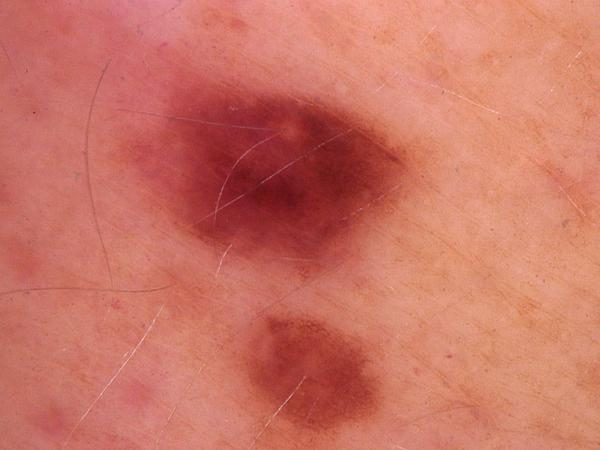

In [0]:
from IPython.display import Image
Image('/content/drive/My Drive/CS412-Project/Data_SkinCancer/Image_1.jpg')

In [10]:
from PIL import Image

def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    print("width is",width)
    print("height is",height)
    return width*height

print(get_num_pixels('/content/drive/My Drive/CS412-Project/Data_SkinCancer/Image_1.jpg'))


width is 600
height is 450
270000


In [90]:
df_test = pd.read_csv('/content/drive/My Drive/SkinClassifierData/Test.csv')
df_test.head(-1)
# all test data labels are 0


,Id,Category
0,Image_10001,0
1,Image_10002,0
2,Image_10003,0
3,Image_10004,0
4,Image_10005,0
...,...,...
4994,Image_14995,0
4995,Image_14996,0
4996,Image_14997,0
4997,Image_14998,0


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
#img = image.load_img('/content/drive/My Drive/CS412-Project/Data_SkinCancer/Image_'+str(1)+'.jpg', target_size=(28,28,1), grayscale=False)

# We dont have grayscale images, so while loading the images we will keep grayscale=False
train_image = []
for i in tqdm(range(1,df_train.shape[0])):
    img = image.load_img('/content/drive/My Drive/CS412-Project/Data_SkinCancer/Image_'+str(i)+'.jpg', target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)


100%|██████████| 9999/9999 [1:00:18<00:00,  2.76it/s]


In [73]:
#y_temp = df_train['Category']
y=df_train['Category'].values
y = y[:-1] #drop bottom 
y = to_categorical(y)
print(y[0])
print(y.shape)



[0. 0. 1. 0. 0. 0.]
(9999, 6)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [77]:

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Train on 7999 samples, validate on 2000 samples
Epoch 1/10
7999/7999 [==============================] - 22s 3ms/step - loss: 1.2541 - accuracy: 0.4904 - val_loss: 1.1609 - val_accuracy: 0.5195
Epoch 2/10
7999/7999 [==============================] - 22s 3ms/step - loss: 1.1724 - accuracy: 0.5303 - val_loss: 1.1602 - val_accuracy: 0.5475
Epoch 3/10
7999/7999 [==============================] - 27s 3ms/step - loss: 1.1315 - accuracy: 0.5487 - val_loss: 1.0871 - val_accuracy: 0.5660
Epoch 4/10
7999/7999 [==============================] - 23s 3ms/step - loss: 1.0919 - accuracy: 0.5682 - val_loss: 1.0695 - val_accuracy: 0.5770
Epoch 5/10
7999/7999 [==============================] - 23s 3ms/step - loss: 1.0613 - accuracy: 0.5811 - val_loss: 1.0398 - val_accuracy: 0.5835
Epoch 6/10
7999/7999 [==============================] - 22s 3ms/step - loss: 1.0317 - accuracy: 0.5904 - val_loss: 1.0245 - val_accuracy: 0.6065
Epoch 7/10
7999/7999 [==============================] - 22s 3ms/step - loss: 1.013

In [92]:
#starts with Image_10001	
#there are 5000 rows, ends with 15000

test_image = []
for i in tqdm(range(10001,15001)):
    img = image.load_img('/content/drive/My Drive/CS412-Project/Data_SkinCancer/Image_'+str(i)+'.jpg', target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)


100%|██████████| 5000/5000 [30:07<00:00,  2.77it/s]


In [95]:
prediction = model.predict_classes(test)
print(prediction)

[2 3 1 ... 2 3 2]


In [102]:
# creating submission file
sample = pd.read_csv('/content/drive/My Drive/SkinClassifierData/Test.csv')
sample['Category'] = prediction
sample.head(-5)

,Id,Category
0,Image_10001,2
1,Image_10002,3
2,Image_10003,1
3,Image_10004,2
4,Image_10005,3
...,...,...
4990,Image_14991,2
4991,Image_14992,5
4992,Image_14993,5
4993,Image_14994,2
